In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('spam_detection.csv',encoding=('ISO-8859-1'),usecols=['v2'])

In [36]:
data

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ?_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [37]:
data.head()

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
# renaming the cols
data.rename(columns={'v2':'text'},inplace=True)

In [39]:
data.tail()

,text
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ?_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...
5571,Rofl. Its true to its name


In [40]:
# missing values
data.isnull().sum()

text    0
dtype: int64

In [41]:
data.shape

(5572, 1)

In [42]:
# check for duplicate values
data.duplicated().sum()

403

In [43]:
# remove duplicates
data = data.drop_duplicates(keep='first')

In [44]:
data.duplicated().sum()

0

EDA

In [45]:
import nltk

In [46]:
# num of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
data['num_characters'] = data['text'].apply(len)

In [48]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [49]:
data.head()

,text,num_words,num_characters,num_sentences
0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,Ok lar... Joking wif u oni...,8,29,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,U dun say so early hor... U c already then say...,13,49,1
4,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [51]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words=stopwords.words("english")

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gowtham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [54]:
data['transformed_text'] = data['text'].apply(transform_text)

In [55]:
data.head()

,text,num_words,num_characters,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(X)
clf = KMeans(n_clusters=3) 
model = clf.fit(features)
labels = model.fit_predict(features)

In [31]:
labels

array([2, 2, 2, ..., 2, 2, 2])

In [32]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids,    min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [33]:
top_feats_per_cluster(X, labels, features, min_tfidf=0.1, top_n=25)

NameError: name 'top_mean_feats' is not defined

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(data['transformed_text'])

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

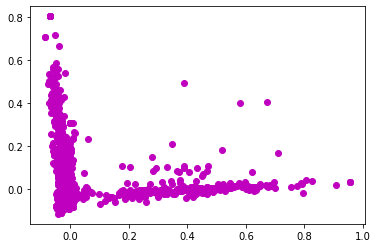

In [61]:
X_dense = X.todense()
coords=pca.fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

In [63]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [64]:
features = vect.get_feature_names()
print(top_feats_in_doc(data['transformed_text'], features, 1, 10))

AttributeError: 'str' object has no attribute 'toarray'